# Problem 1 - Bonus Tasks
Authors: 
* Oscar Eriksson, 0011301991, oscer@kth.se
* Philip Ahrendt, 960605R119, pcah@kth.se

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import maze_bonus as mz 
import matplotlib.pyplot as plt

In [6]:
maze = np.array([
        [0, 0, 1, 0, 0, 0, 0, 3],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 2, 0, 0]
    ])

env = mz.Maze(maze, minotaur_stay=False,  move_to_player=True)
start  = (0,0,6,5,0);

## Q-Learning

### Exploration Parameter

In [7]:
method = 'qLearn'
V, policy, Vs, Q = mz.q_learning(env, start, gamma=49/50, epsilon=0.1, alpha=2/3,num_episodes=50000)


  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [04:21<00:00, 191.39it/s]


In [9]:
V2, policy2, Vs2, Q2 = mz.q_learning(env, start,gamma=49/50, epsilon=0.5,alpha=2/3,num_episodes=50000);


100%|██████████| 50000/50000 [04:01<00:00, 207.38it/s]


In [41]:
success_cnt = 0
success_cnt2 = 0
t_death = []
for _ in range(50000):
    path, dead = env.simulate(start, policy, method);
    path2, dead2 = env.simulate(start, policy2, method);
    t_death.append(dead)
    if path[-1][0:2] == (6,5):
        success_cnt += 1
    if path2[-1][0:2] == (6,5):
        success_cnt2 += 1
print("Probability of escape \u03B51:", success_cnt/5e4)
print("Probability of escape \u03B52:", success_cnt2/5e4)
# print(np.mean(t_death))
# print(t_death)

Probability of escape ε1: 0.40376
Probability of escape ε2: 0.47076


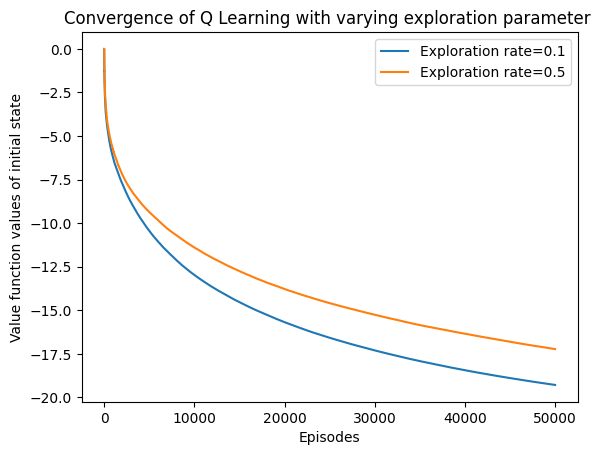

V: -17.224846538443476
Q: [ -19.28226585 -119.04178435  -19.28228915 -119.05275227  -19.28237792]


In [16]:
plt.plot(range(len(Vs[:])), Vs[:], label=f"Exploration rate={0.1}")
plt.plot(range(len(Vs2[:])), Vs2[:], label=f"Exploration rate={0.5}")
plt.title("Convergence of Q Learning with varying exploration parameter ")
plt.ylabel("Value function values of initial state")
plt.xlabel("Episodes")
plt.legend()
plt.show()
print("V:", V2[env.map[start]])
print("Q:", Q[env.map[start],:])

## Step size

In [37]:
method = 'qLearn'
V3, policy3, Vs3, Q3 = mz.q_learning(env, start, gamma=49/50, epsilon=0.1, alpha=0.6,num_episodes=50000)


100%|██████████| 50000/50000 [03:31<00:00, 236.04it/s]


In [38]:
V4, policy4, Vs4, Q4 = mz.q_learning(env, start, gamma=49/50, epsilon=0.1, alpha=0.9,num_episodes=50000)

100%|██████████| 50000/50000 [06:22<00:00, 130.75it/s]


In [ ]:
success_cnt3 = 0
success_cnt4 = 0
for _ in range(50000):
    path3, _ = env.simulate(start, policy3, method);
    path4, _ = env.simulate(start, policy4, method);
    t_death.append(dead)
    if path3[-1][0:2] == (6,5):
        success_cnt3 += 1
    if path4[-1][0:2] == (6,5):
        success_cnt4 += 1
print("Probability of escape alpha 1", success_cnt3/5e4)
print("Probability of escape alpha 2", success_cnt4/5e4)

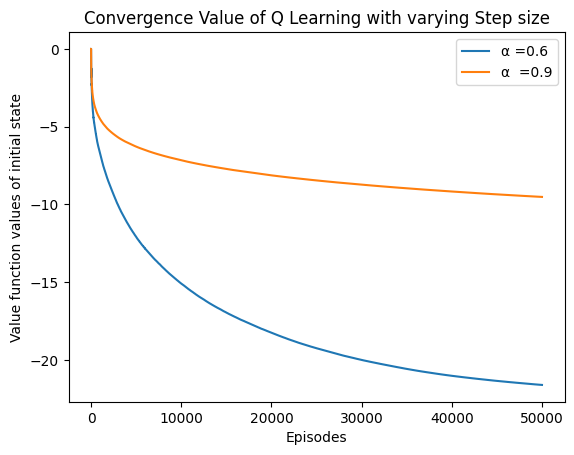

In [39]:
plt.plot(range(len(Vs3[:])), Vs3[:], label=f"\u03B1 ={0.6}")
plt.plot(range(len(Vs4[:])), Vs4[:], label=f"\u03B1  ={0.9}")
plt.title("Convergence Value of Q Learning with varying Step size")
plt.ylabel("Value function values of initial state")
plt.xlabel("Episodes")
plt.legend()
plt.show()

In [90]:

# Size of the maze
# rows,cols = maze.shape;

# # Create figure of the size of the maze
# fig = plt.figure(1, figsize=(cols,rows));

# # Remove the axis ticks and add title title
# ax = plt.gca();
# ax.set_title('Policy simulation');
# ax.set_xticks([]);
# ax.set_yticks([]);

# # Give a color to each cell
# colored_maze = [[col_map[maze[j,i]] for i in range(cols)] for j in range(rows)];
path, dead = env.simulate(start, policy, method);
print(path)


[(0, 0, 6, 5, 0), (0, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 5, 6, 0), (2, 0, 6, 6, 0), (1, 0, 6, 7, 0), (2, 0, 5, 7, 0), (2, 0, 5, 6, 0), (3, 0, 5, 5, 0), (4, 0, 6, 5, 0), (4, 1, 6, 6, 0), (4, 2, 6, 7, 0), (4, 3, 5, 7, 0), (3, 3, 4, 7, 0), (2, 3, 5, 7, 0), (2, 4, 6, 7, 0), (1, 4, 6, 6, 0), (2, 4, 6, 7, 0), (1, 4, 6, 6, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 5, 5, 0), (2, 4, 5, 6, 0), (3, 4, 4, 6, 0), (2, 4, 4, 5, 0), (2, 4, 3, 5, 0), (1, 4, 2, 5, 0), (0, 4, 2, 6, 0), (0, 5, 2, 5, 0), (0, 6, 3, 5, 0), (0, 6, 2, 5, 0), (0, 7, 1, 5, 1), (0, 6, 1, 6, 1), (0, 5, 2, 6, 1), (0, 4, 2, 5, 1), (1, 4, 2, 6, 1), (2, 4, 1, 6, 1), (3, 4, 0, 6, 1), (4, 4, 0, 5, 1), (4, 5, 0, 4, 1), (4, 6, 0, 3, 1), (4, 7, 1, 3, 1), (5, 7, 1, 4, 1), (6, 7, 1, 3, 1), (6, 6, 1, 4, 1), (6, 5, 1, 5, 1), (6, 5, 2, 5, 1), (6, 5, 2, 6, 1), (6, 5, 2, 7, 1), (6, 5, 1, 7, 1), (6, 5, 2, 7, 1), (6, 5, 1, 7, 1), (6, 5, 0, 7, 

## SARSA

In [27]:
V5, policy5, Vs5, Q5 = mz.sarsa(env, start, 49/50, 0.1,alpha=2/3,num_episodes=50000);
V6, policy6, Vs6, Q6 = mz.sarsa(env, start, 49/50, 0.2,alpha=2/3,num_episodes=50000);


100%|██████████| 50000/50000 [15:47<00:00, 52.76it/s]


In [ ]:
success_cnt3 = 0
for _ in range(50000):
    path3, _ = env.simulate(start, policy3, method);
    if path3[-1][0:2] == (6,5):
        success_cnt3 += 1
print(success_cnt3/5e4)

0.3893


In [1]:
plt.plot(range(len(Vs5[:])), Vs5[:], label=f"Exploration rate={0.1}")
plt.plot(range(len(Vs6[:])), Vs6[:], label=f"Exploration rate={0.2}")
plt.title("Convergence of SARSA with varying exploration parameter ")
plt.ylabel("Value function values of initial state")
plt.xlabel("Episodes")
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [11]:
_, policy7, Vs7, _ = mz.sarsa(env, start, 49/50, 0.1,alpha=2/3,num_episodes=50000, decreasing_epsilon=True);


100%|██████████| 50000/50000 [05:08<00:00, 161.89it/s]


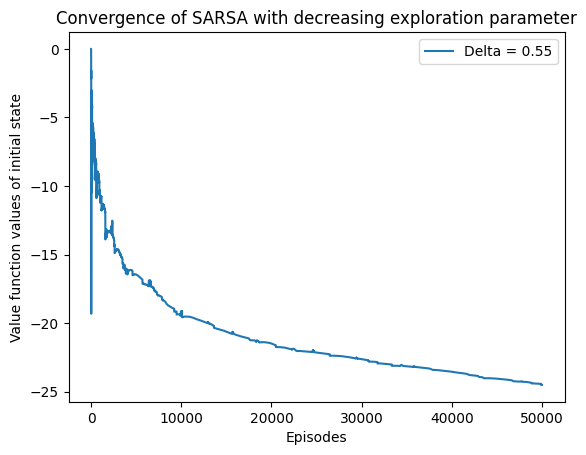

In [12]:
plt.plot(range(len(Vs7[:])), Vs7[:], label=f"Delta = {0.55}")
plt.title("Convergence of SARSA with decreasing exploration parameter")
plt.ylabel("Value function values of initial state")
plt.xlabel("Episodes")
plt.legend()
plt.show()

## Probabilities

### Q-Learning

In [35]:
success_cnt = 0
success_cnt7 = 0
t_death = []

for _ in range(50000):
    path, dead = env.simulate(start, policy, method);
    path7, dead7 = env.simulate(start, policy7, method);
    t_death.append(dead)
    if path[-1][0:2] == (6,5):
        success_cnt += 1
    if path7[-1][0:2] == (6,5):
        success_cnt7 += 1
print("Probability of escape Q-learning", success_cnt/5e4)
print("Probability of escape SARSA", success_cnt7/5e4)


labels = ['Q-learning', 'SARSA']
probabilities = [success_cnt/5e4, success_cnt7/5e4]
colors = ['darkblue', 'darkgreen']

plt.bar(labels, probabilities, color=colors)
plt.title('Escape probability for different algorithms')
plt.ylabel('Survival probability')
plt.xlabel('Episode length')

plt.show()


Probability of escape Q-learning 0.39704
Probability of escape SARSA 0.279


NameError: name 'p' is not defined

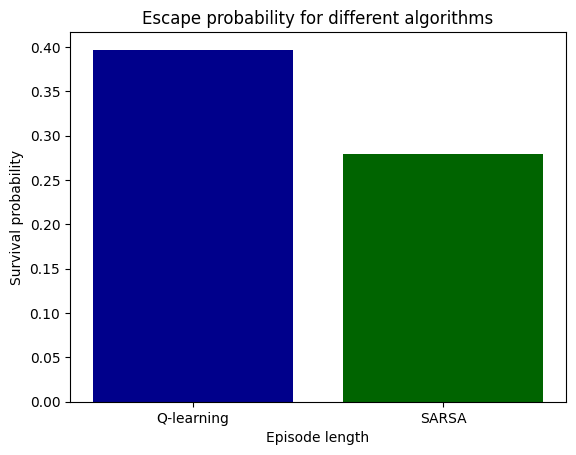

In [40]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Q-learning', 'SARSA']
probabilities = [success_cnt/5e4, success_cnt7/5e4]
colors = ['darkblue', 'darkgreen']
parameters = ['\u03B1', 'epsilon']
# values = [[], 0.1]

plt.bar(labels, probabilities, color=colors)
plt.title('Escape probability for different algorithms')
plt.ylabel('Survival probability')
plt.xlabel('Episode length')

# for i in range(len(labels)):
    # plt.text(labels[i], probabilities[i], f'{parameters[i]}={values[i], }', ha='center', va='bottom')

plt.show()

# Demonstrate policy

In [2]:
def demo_policy(env, policy):
    """!@brief Visualizes the moves of a given policy.
    
    Minotaur always fixed at (4,4). Moves are shown as arrows. 
    """
    LIGHT_GREEN  = '#95FD99'
    BLACK        = '#000000'
    WHITE        = '#FFFFFF'
    LIGHT_PURPLE = '#E8D0FF'
    RED          = '#FF0000';


    col_map = {0: WHITE, 1: BLACK, 2: LIGHT_GREEN, 3: LIGHT_PURPLE}

    # Size of the maze
    rows,cols = env.maze.shape

    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols,rows))

    # Remove the axis ticks and add title title
    ax = plt.gca()
    ax.set_title('Policy simulation at time step 0')
    ax.set_xticks([])
    ax.set_yticks([])

    # Give a color to each cell
    colored_maze = [[col_map[env.maze[j,i]] for i in range(cols)] for j in range(rows)]
    
    # Create figure of the size of the maze
    fig = plt.figure(1, figsize=(cols,rows))
    
    # Create a table to color
    grid = plt.table(cellText=None, cellColours=colored_maze, cellLoc='center',loc=(0,0),edges='closed')

    # Modify the hight and width of the cells in the table
    tc = grid.properties()['children']
    for cell in tc:
        cell.set_height(1.0/rows)
        cell.set_width(1.0/cols)

    minotaur_pos = (6,5)
    grid.get_celld()[(minotaur_pos)].set_facecolor(RED)
    grid.get_celld()[(minotaur_pos)].get_text().set_text('Minotaur')
    for x in range(7):
        for y in range(8):
            if env.maze[x,y] != 1 and (x,y) != (6,5) and (x,y) != minotaur_pos:
                a = policy[env.map[(x,y,*minotaur_pos, 0)]]
                # New markings
                if a == 0: 
                    arrow = 'wait'
                elif a == 1:
                    arrow = '\u2190'
                elif a == 2:
                    arrow = '\u2192'
                elif a == 3:
                    arrow = '\u2191'
                else:
                    arrow = '\u2193'
                grid.get_celld()[(x,y)].get_text().set_text(arrow)
    plt.show()

In [3]:
demo_policy(env, policy2)

NameError: name 'env' is not defined